## MVP SPRINT-3: Qualidade de Software, Segurança e Sistemas Inteligentes.

## Marcos Filipi Ayres Costa

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/filipiayres/MVP-3/main/cardio_train.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,1:7]
y = array[:,11]
print (f"A entrada foi {X}")
print (f"-----------------------")
print (f"A saida foi {y}")

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

A entrada foi [[1.8393e+04 2.0000e+00 1.6800e+02 6.2000e+01 1.1000e+02 8.0000e+01]
 [2.0228e+04 1.0000e+00 1.5600e+02 8.5000e+01 1.4000e+02 9.0000e+01]
 [1.8857e+04 1.0000e+00 1.6500e+02 6.4000e+01 1.3000e+02 7.0000e+01]
 ...
 [1.9066e+04 2.0000e+00 1.8300e+02 1.0500e+02 1.8000e+02 9.0000e+01]
 [2.2431e+04 1.0000e+00 1.6300e+02 7.2000e+01 1.3500e+02 8.0000e+01]
 [2.0540e+04 1.0000e+00 1.7000e+02 7.2000e+01 1.2000e+02 8.0000e+01]]
-----------------------
A saida foi [1. 1. 0. ... 0. 0. 1.]


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.770982 (0.002253)
CART: 0.676036 (0.005387)
NB: 0.803161 (0.000459)
SVM: 0.803732 (0.000054)


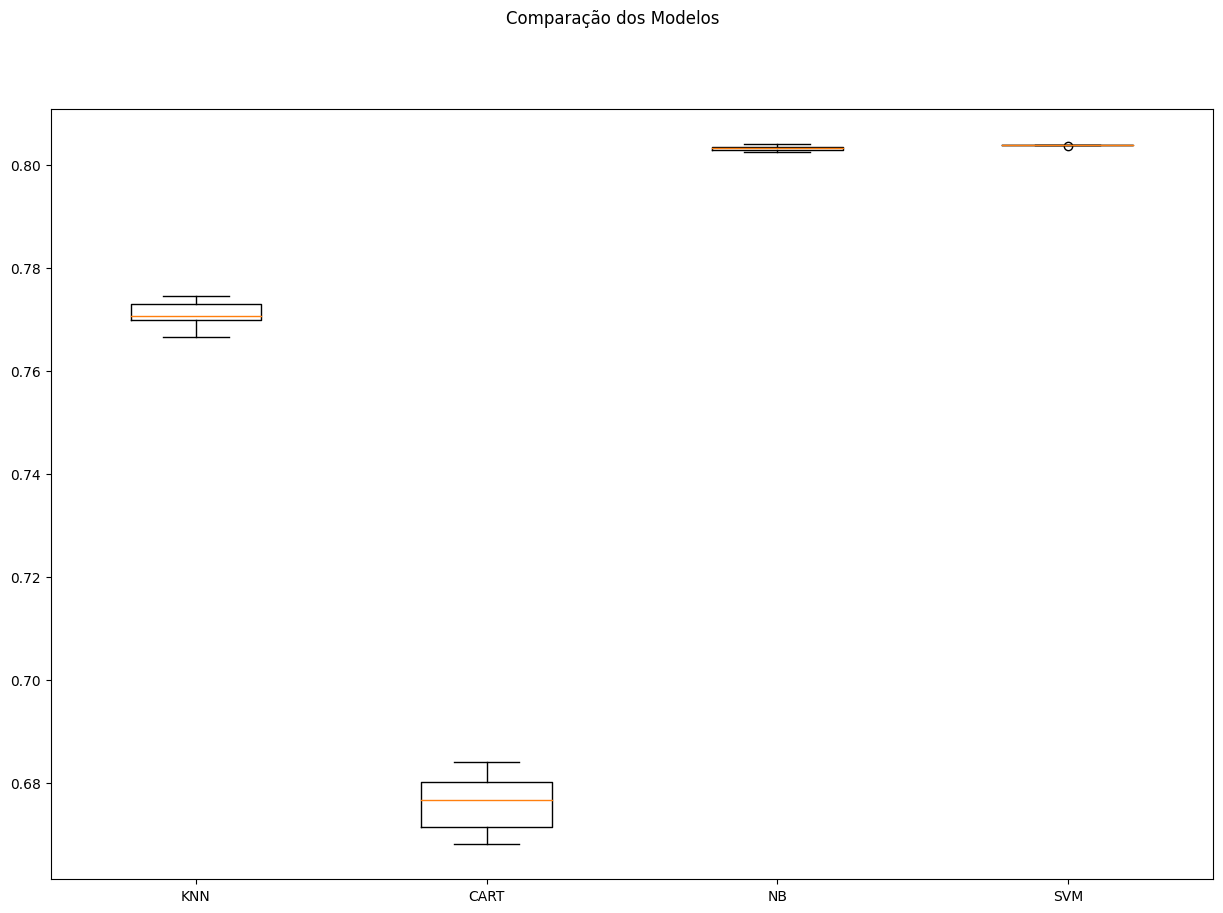

In [ ]:


np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.771 (0.002)
CART-orig: 0.676 (0.005)
NB-orig: 0.803 (0.000)
SVM-orig: 0.804 (0.000)
KNN-padr: 0.769 (0.002)
CART-padr: 0.675 (0.006)
NB-padr: 0.803 (0.000)
SVM-padr: 0.804 (0.000)
KNN-norm: 0.768 (0.004)
CART-norm: 0.676 (0.005)
NB-norm: 0.803 (0.000)
SVM-norm: 0.804 (0.000)


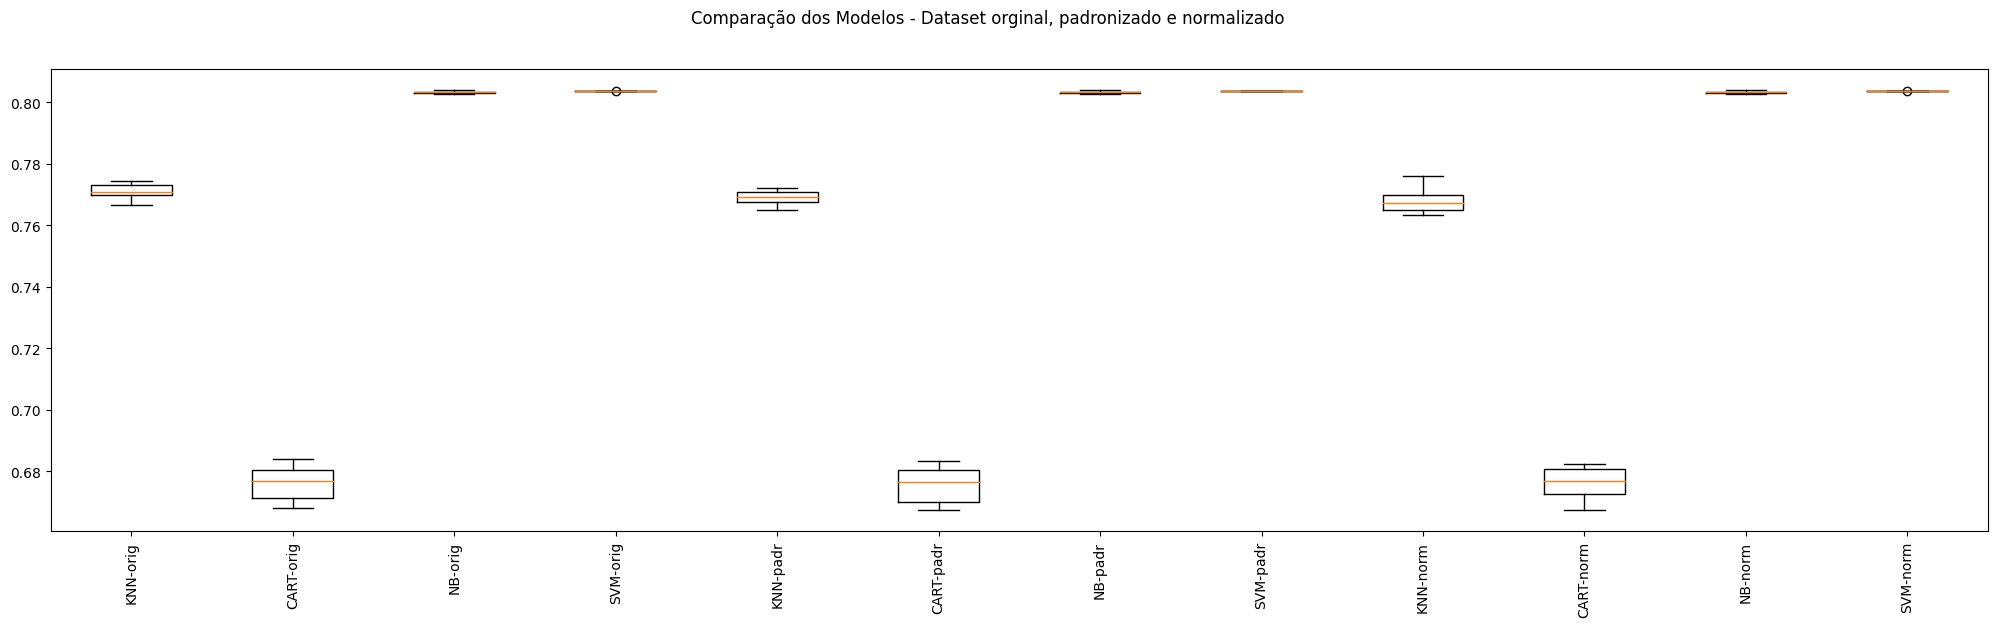

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.803286 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-padr - Melhor: 0.802393 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.802625 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=15)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8011428571428572


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'age':  [21, 19, 52],
        'gender': [2, 1, 2],
        'height': [150, 160, 155],
        'weight': [60.0, 53.0, 73.0],
        'ap_hi': [180, 160, 110],
        'ap_lo': [79, 60, 90],
        }

atributos = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-7.88245682  1.36405487 -1.74897809 -0.98680408  0.33233302 -0.09354435]
 [-7.88326744 -0.73310834 -0.53096134 -1.47306195  0.20247159 -0.19435552]
 [-7.86989214  1.36405487 -1.13996972 -0.08375375 -0.12218198 -0.03517999]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 1.]


**Fazendo o download do arquivo KNN pkl**

In [ ]:
import pickle
from google.colab import files

# Salvar o modelo usando pickle
with open('cardio_knn.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)

# Baixar o arquivo para o ambiente local
files.download('cardio_knn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Fazendo o download do arquivo joblib**

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Seus dados de treinamento
data = {'age':  [40, 55, 59],
        'gender': [1, 2, 3],
        'ap_hi': [1, 0, 1],
        'ap_lo': [1, 0, 1],
        'cholesterol': [0, 0, 1],
        }

atributos = ['age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol']
entrada = pd.DataFrame(data, columns=atributos)

# Extrair as features
newX_train = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(newX_train)

# Salvar o scaler em um arquivo
dump(scaler, 'cardio_scaler.joblib')

# Fazer o download do arquivo
files.download('cardio_scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Regressão Linear**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load

In [ ]:
# Cria o modelo
modelo = LogisticRegression(solver='liblinear')

# Treina o modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Salva o modelo no disco
filename = 'cardio_lr.pkl'
dump(modelo, open(filename, 'wb'))

**Carrega o modelo**

In [ ]:
# Algum tempo depois...
# Carrega o modelo do disco
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8037142857142857


In [ ]:
# Baixar o arquivo para o ambiente local
files.download('cardio_lr.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>